# Problem statement

Life expectancy is a statistical measure of the average time a human being is expected to live, Life expectancy depends on various factors: Regional variations, Economic Circumstances, Sex Differences, Mental Illnesses, Physical Illnesses, Education, Year of their birth and other demographic factors. This problem statement provides a way to predict average life expectancy of people living in a country when various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country are given.

## Importing and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [1]:
#Credentials removed

LE = pd.read_csv(body)
LE.head()

NameError: name 'pd' is not defined

## Data exploration

Analyze the dataset. Find out the patterns in the dataset and find the relationship between different variables and frequency of different variables of the dataset.

In [3]:
LE.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
LE.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
LE.shape

(2938, 22)

In [7]:
LE.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
LE.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

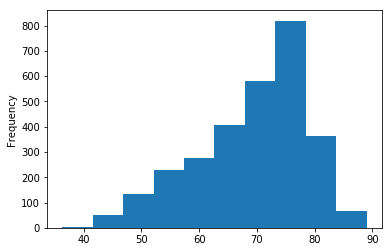

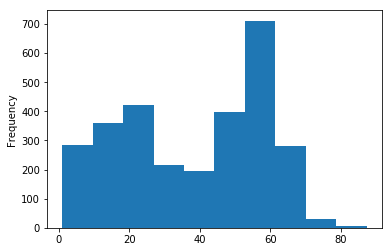

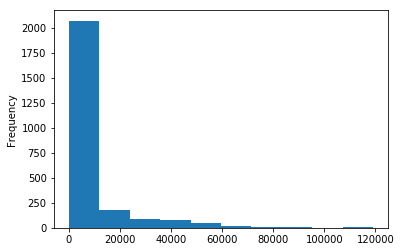

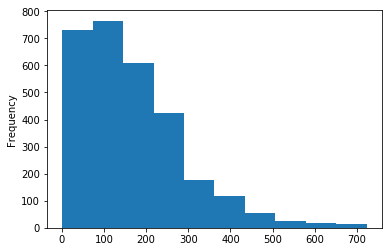

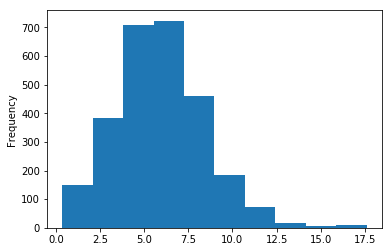

In [9]:
LE['Life expectancy '].plot.hist()
plt.show()
LE[' BMI '].plot.hist()
plt.show()
LE['GDP'].plot.hist()
plt.show()
LE['Adult Mortality'].plot.hist()
plt.show()
LE['Total expenditure'].plot.hist()
plt.show()

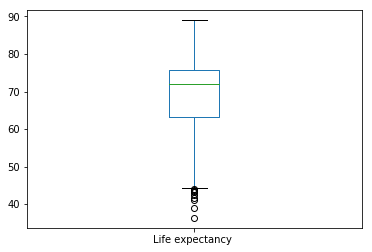

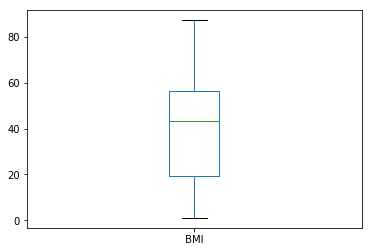

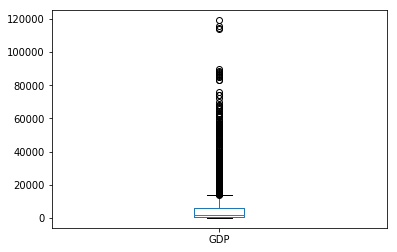

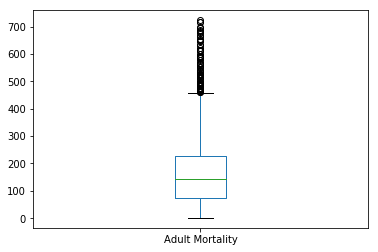

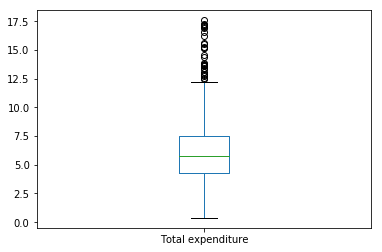

In [10]:
LE['Life expectancy '].plot.box()
plt.show()
LE[' BMI '].plot.box()
plt.show()
LE['GDP'].plot.box()
plt.show()
LE['Adult Mortality'].plot.box()
plt.show()
LE['Total expenditure'].plot.box()
plt.show()

In [11]:
LE['Country'].value_counts()

Serbia                              16
New Zealand                         16
Portugal                            16
Norway                              16
Lao People's Democratic Republic    16
Malawi                              16
Bahamas                             16
Lesotho                             16
South Sudan                         16
Central African Republic            16
Barbados                            16
Czechia                             16
Sierra Leone                        16
Mozambique                          16
Israel                              16
Comoros                             16
Morocco                             16
Togo                                16
Iceland                             16
Burundi                             16
El Salvador                         16
Iran (Islamic Republic of)          16
France                              16
Singapore                           16
Slovakia                            16
Maldives                 

In [12]:
LE['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

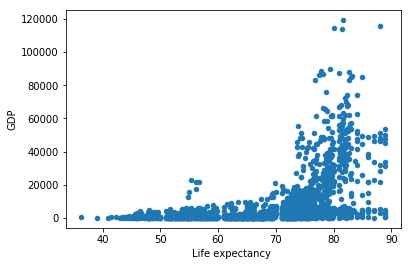

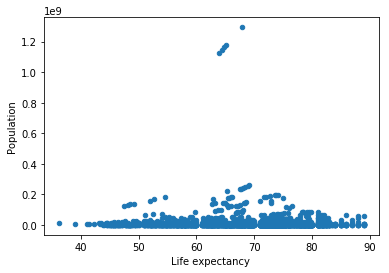

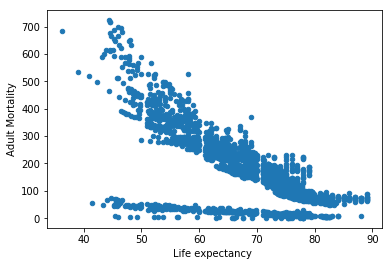

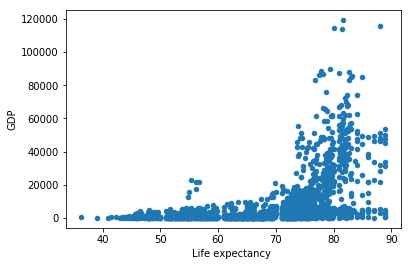

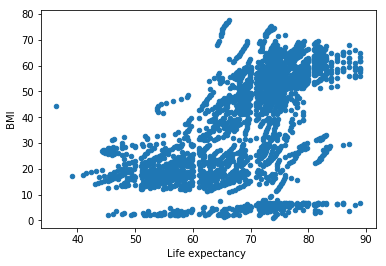

In [13]:
LE.plot.scatter('Life expectancy ','GDP')
plt.show()
LE.plot.scatter('Life expectancy ','Population')
plt.show()
LE.plot.scatter('Life expectancy ','Adult Mortality')
plt.show()
LE.plot.scatter('Life expectancy ','GDP')
plt.show()
LE.plot.scatter('Life expectancy ',' BMI ')
plt.show()

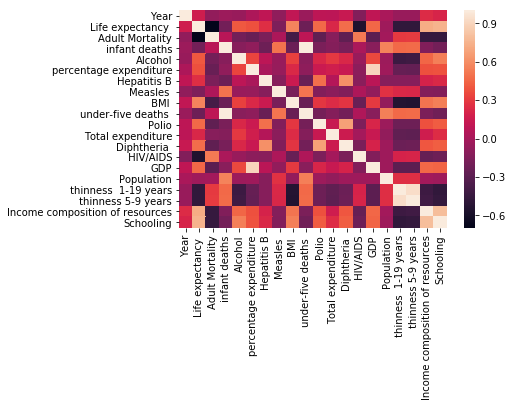

In [14]:
sns.heatmap(LE.corr())

## Renaming Columns with spelling mistakes

In [15]:
LE.rename(columns = {'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness 1-19 years',' thinness 5-9 years':'thinness 5-9 years'}, inplace = True)
LE.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Treating missing values and removing duplicates

In [16]:
#Finding missing values in continuous variables
LE.drop_duplicates()
LE.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
#Finding missing values in categorical variables

LE.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [18]:
#Replacing missing values with the mean of the corresponding columns

LE['BMI'].fillna(LE['BMI'].mean(),inplace = True)
LE['Life expectancy'].fillna(LE['Life expectancy'].mean(),inplace = True)
LE['Hepatitis B'].fillna(LE['Hepatitis B'].mean(), inplace = True)
LE['Diphtheria'].fillna(LE['Diphtheria'].mean(), inplace = True)
LE['Total expenditure'].fillna(LE['Total expenditure'].mean(), inplace = True)
LE['Polio'].fillna(LE['Polio'].mean(),inplace = True)
LE['Adult Mortality'].fillna(LE['Adult Mortality'].mean(),inplace = True)
LE['Alcohol'].fillna(LE['Alcohol'].mean(), inplace = True)
LE['thinness 1-19 years'].fillna(LE['thinness 1-19 years'].mean(), inplace = True)
LE['thinness 5-9 years'].fillna(LE['thinness 5-9 years'].mean(), inplace = True)
LE['Schooling'].fillna(LE['thinness 5-9 years'].mean(), inplace = True)
LE['Income composition of resources'].fillna(LE['Income composition of resources'].mean(), inplace = True)
LE['Population'].fillna(LE['Population'].mean(), inplace = True)
LE['GDP'].fillna(LE['GDP'].mean(), inplace = True)
LE.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Creating the model

In [19]:
#Creating dummy variables for non-numeric data variables

country_dummies = pd.get_dummies(LE['Country'])
status_dummies = pd.get_dummies(LE['Status'])
status_dummies.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
#Creating a new table with all the dummy variables attached
merged = pd.concat([LE,country_dummies,status_dummies], axis = 'columns')
merged = merged.drop(['Country','Status','Zimbabwe','Developing'], axis = 'columns')
merged.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Developed
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = merged.drop('Life expectancy', axis = 'columns')
y = merged['Life expectancy']

In [22]:
#Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#calculating mean absolute error
print(MAE(y_test , y_pred ))
print(MSE(y_test , y_pred ))
print(np.sqrt(MSE(y_test , y_pred )))

1.2433793787374723
3.9067676913660607
1.9765544999736437


In [26]:
!pip install watson-machine-learning-client

In [27]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-31 07:13:25,438 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [2]:
#wml credentials removed

In [29]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [30]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "", 
               client.repository.ModelMetaNames.NAME: "Life_Expectancy_Prediction"}
#model_props credentials removed

In [31]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [32]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [33]:
published_model_uid

'cd4bb854-3979-4a8d-a07c-babbc5f17d44'

In [34]:
deployment = client.deployments.create(published_model_uid, name="Life_Expectancy_Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'cd4bb854-3979-4a8d-a07c-babbc5f17d44' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ed89fd28-87d6-4631-8afb-c2e6ff5b021d'
------------------------------------------------------------------------------------------------




In [35]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [36]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/9efd027d-a7f2-40d9-a393-64675054bded/deployments/ed89fd28-87d6-4631-8afb-c2e6ff5b021d/online'